<a href="https://colab.research.google.com/github/MateoGlz/Progra-Analitica-Descriptica-Predictiva/blob/main/PracticaRegresionLinealSimple_MateoGonzalezLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Mateo Gonzalez Lopez
*   263881

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [23]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
ruta = '/content/drive/MyDrive/Colab_Notebooks/restaurantes.csv'
df = pd.read_csv(ruta)
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,poblation,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [24]:
df.info()

print(df.dtypes)

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblation  97 non-null     float64
 1   profit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
poblation    float64
profit       float64
dtype: object
poblation    0
profit       0
dtype: int64


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

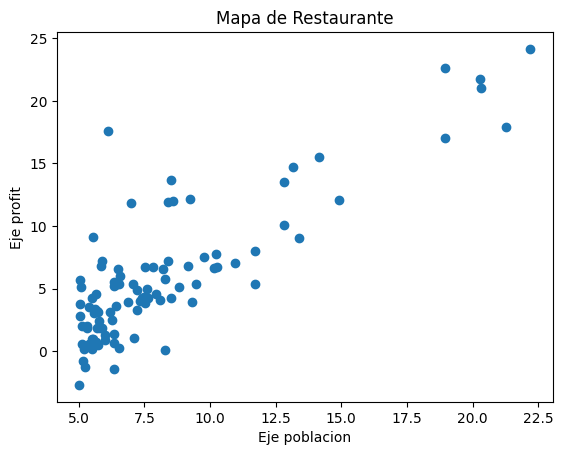

In [25]:
# Diagrama de dispersión
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(df['poblation'], df['profit'])

plt.xlabel("Eje poblacion")
plt.ylabel("Eje profit")
plt.title("Mapa de Restaurante")

# Mostrar el gráfico
plt.show()

Si, Si lo es ya que ambas variables suben proporcionalmente mente pero no exponencialmente

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

In [26]:
import pandas as pd

correlacion = df['poblation'].corr(df['profit'])
print(f"Coeficiente de correlación de Pearson: {correlacion:.4f}")

Coeficiente de correlación de Pearson: 0.8379


Es muy fuerte con un 0.8379 es muy amplio, es positiva y si coincide con el grafico interior.

## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['poblation']]
y = df['profit']

modelo = LinearRegression()
modelo.fit(X, y)

intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]
r_cuadrado = modelo.score(X, y)

print(f"Intercepto: {intercepto:.4f}")
print(f"Coeficiente: {coeficiente:.4f}")
print(f"R²: {r_cuadrado:.4f}")
print(f"Ecuación: profit = {coeficiente:.4f} × poblation + {intercepto:.4f}")

poblaciones = np.array([5, 10, 15, 20]).reshape(-1, 1)
predicciones = modelo.predict(poblaciones)

print("\nPredicciones:")
for i, pob in enumerate([5, 10, 15, 20]):
    print(f"Población {pob}: profit = {predicciones[i]:.2f}")

Intercepto: -3.8958
Coeficiente: 1.1930
R²: 0.7020
Ecuación: profit = 1.1930 × poblation + -3.8958

Predicciones:
Población 5: profit = 2.07
Población 10: profit = 8.03
Población 15: profit = 14.00
Población 20: profit = 19.96


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?**

Significa que si no hay clientes las perdidas serian 3,895.8 debido a gastos operativos

**Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?**

Que cada que suban 1000 personas entonces se obtendra un rendimeinto agregado a los estimado de 1,193

### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

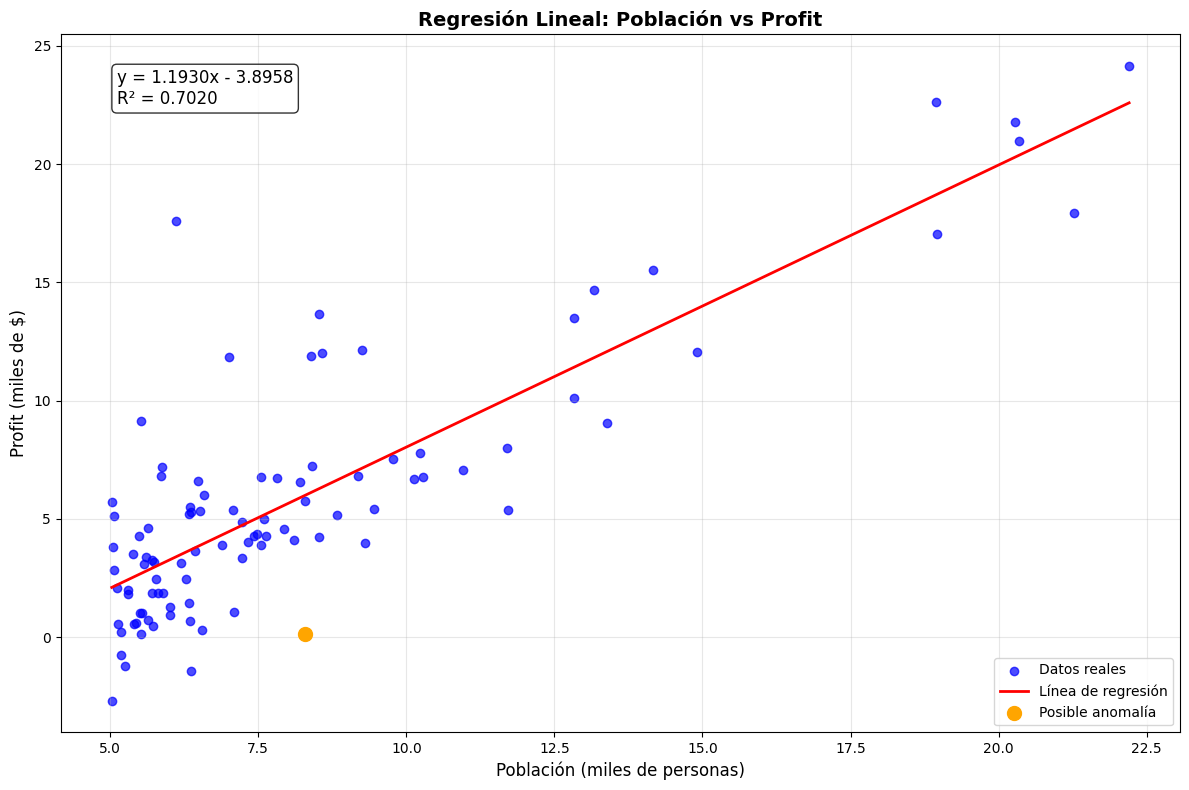

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

plt.scatter(df['poblation'], df['profit'], alpha=0.7, color='blue', label='Datos reales')

x_line = np.linspace(df['poblation'].min(), df['poblation'].max(), 100)
y_line = 1.1930 * x_line - 3.8958

plt.plot(x_line, y_line, color='red', linewidth=2, label='Línea de regresión')

anomalia_x = 8.2934
anomalia_y = 0.14454
plt.scatter(anomalia_x, anomalia_y, color='orange', s=100, label='Posible anomalía', zorder=5)

plt.xlabel('Población (miles de personas)', fontsize=12)
plt.ylabel('Profit (miles de $)', fontsize=12)
plt.title('Regresión Lineal: Población vs Profit', fontsize=14, fontweight='bold')

plt.legend()

plt.grid(True, alpha=0.3)

equation_text = f'y = 1.1930x - 3.8958\nR² = 0.7020'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

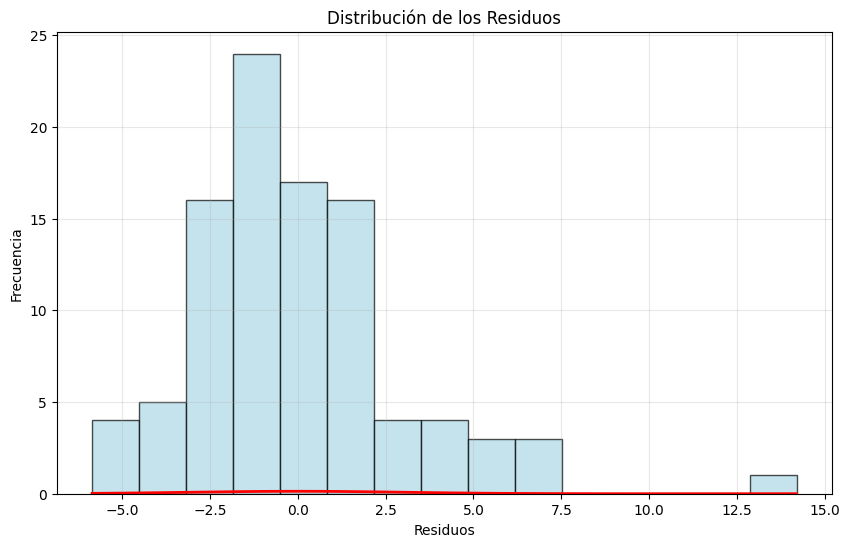

Prueba de normalidad Shapiro-Wilk: p-value = 0.0000
Los residuos NO siguen una distribución normal


In [29]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

y_pred = modelo.predict(X)
residuos = y - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=15, alpha=0.7, color='lightblue', edgecolor='black')

x = np.linspace(residuos.min(), residuos.max(), 100)
plt.plot(x, stats.norm.pdf(x, residuos.mean(), residuos.std()), 'r-', linewidth=2)

plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(residuos)
print(f"Prueba de normalidad Shapiro-Wilk: p-value = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("Los residuos siguen una distribución normal")
else:
    print("Los residuos NO siguen una distribución normal")

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

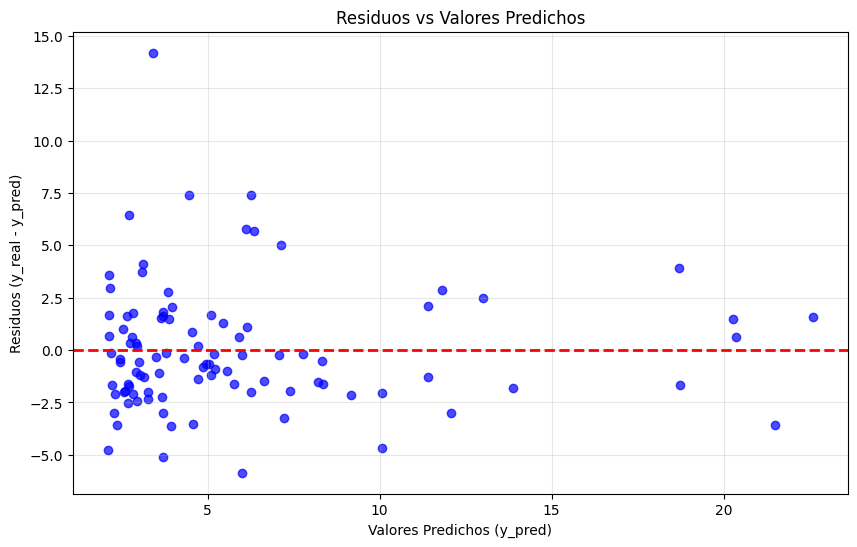

In [30]:
import matplotlib.pyplot as plt

y_pred = modelo.predict(X)
residuos = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos (y_pred)')
plt.ylabel('Residuos (y_real - y_pred)')
plt.grid(True, alpha=0.3)
plt.show()

**¿Los residuos están distribuidos aleatoriamente o muestran un patrón?**

Muestran algun patron pero con una dispercion muy amplia.

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y

b) Desviaciones sistemáticas indican asimetría o colas pesadas.

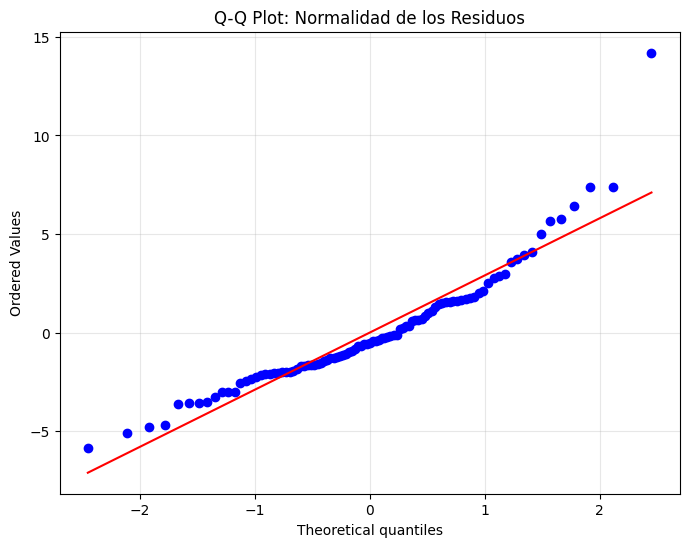

In [31]:
import matplotlib.pyplot as plt
from scipy import stats

# Calcular residuos
y_pred = modelo.predict(X)
residuos = y - y_pred

# Crear Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normalidad de los Residuos')
plt.grid(True, alpha=0.3)
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(" MÉTRICAS DEL MODELO:")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

 MÉTRICAS DEL MODELO:
MSE (Error Cuadrático Medio): 8.9539
RMSE (Raíz del Error Cuadrático Medio): 2.9923
R² (Coeficiente de Determinación): 0.7020


In [33]:
print(" RANGO DE GANANCIAS REALES:")
print(f"Ganancia mínima: {df['profit'].min():.2f}")
print(f"Ganancia máxima: {df['profit'].max():.2f}")
print(f"Ganancia promedio: {df['profit'].mean():.2f}")

 RANGO DE GANANCIAS REALES:
Ganancia mínima: -2.68
Ganancia máxima: 24.15
Ganancia promedio: 5.84


**Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?**

El modelo es útil para identificar la relación entre población y ganancias (explica el 70.2% de la variación), pero tiene limitaciones para predicciones exactas debido a un error promedio del 51.2% (± $2,992) en las estimaciones individuales.

## Parte 6: Conclusiones
Responde con tus propias palabras:
- **¿Qué tan útil consideras el modelo?**

Tiene una utilidad limitada ya que nos dice algo obvio de la relacion viene mas gente ganamos mas.Su funcion seria un verificador sencillo para corregir tendencias macros de tu restaurante que puede ser el viene mas gente pero no gano, mi costeo esta mal o mi valor operativo es alto.

- **¿Qué limitaciones encuentras?**

La falta de analicis de mas variables hacen que su uso para cosas relevantes sea ineficiente por su precision

- **¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.**

No, ya que el problema no radica en tecnico si no en el diseño de las entradas y salidas del modelo. La aportacion de mas varibales seria de mucha mas ayuda que cualquier ajuste tecnico.